In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio 
from collections import defaultdict
import librosa
from pyts.classification import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [8]:
df=pd.read_csv("data_dec_scld.csv")
df_y=pd.read_csv("data_dec_angryvocal.csv")
df=pd.concat([df_y.iloc[:,2:3],df.iloc[:,1:] ],axis=1)
df.shape

(2452, 3001)

In [9]:
df

,2,0,1,2,3,4,5,6,7,8,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,speech,-0.024939,0.011531,0.003824,-0.001133,0.005707,-0.001231,0.004508,0.002861,-0.006809,...,-0.068274,-0.079312,-0.065353,-0.061078,-0.079842,-0.074183,-0.063330,-0.075893,-0.069719,-0.060970
1,speech,0.064653,0.190734,0.011558,-0.162009,-0.037188,0.224411,0.352410,0.234780,0.036427,...,-0.384608,-0.157868,0.050027,0.112627,0.181900,0.165061,0.070171,0.119354,0.241511,0.217111
2,speech,0.020263,0.014409,0.031487,-0.042241,0.006367,0.035380,-0.031561,0.011531,-0.002462,...,-0.030558,0.052983,0.054366,0.044576,-0.022224,-0.057508,-0.037802,-0.044830,0.002466,0.037955
3,song,-0.019103,0.005012,-0.008641,-0.021548,-0.019538,-0.017426,-0.016571,-0.017745,0.007278,...,-0.036528,-0.026591,0.013671,0.009325,-0.008404,-0.006055,-0.024189,-0.025364,-0.020363,-0.028207
4,speech,0.012969,-0.007232,0.003366,-0.008005,0.003822,0.003396,0.001112,-0.000768,-0.002818,...,0.015396,0.015107,0.012921,0.012818,0.011305,0.008308,0.009650,0.012776,0.014175,0.013939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,song,-0.013229,0.004751,-0.008633,0.000095,-0.011264,-0.005826,0.004365,0.000169,0.001596,...,-0.017778,0.025036,0.007569,-0.003107,0.033189,-0.006684,0.027622,0.025792,0.006912,0.014995
2448,song,0.020862,-0.005326,0.001397,-0.007184,-0.005863,0.009098,0.004302,-0.000174,-0.004781,...,0.001969,0.002012,0.004462,0.000616,-0.002328,0.006944,0.001909,-0.009322,0.005042,-0.003479
2449,song,-0.011058,0.005325,0.005335,-0.004699,-0.003718,-0.001578,0.002487,0.004716,-0.001243,...,0.005099,0.003683,0.006438,-0.000840,-0.010548,-0.010964,-0.005570,0.011386,0.017458,0.006248
2450,song,0.008059,0.001253,0.000403,-0.000832,0.000489,-0.000528,-0.003968,0.000497,0.002776,...,-0.009813,-0.013588,-0.009818,-0.009576,-0.012493,-0.016903,-0.008848,-0.003355,-0.004436,-0.001393


In [10]:
index=df.index

In [11]:
index

RangeIndex(start=0, stop=2452, step=1)

In [12]:
X=df.iloc[:,1:]
y=df.iloc[:,0:1]

In [13]:
from tslearn.preprocessing import TimeSeriesScalerMinMax

In [14]:
"""scaler = TimeSeriesScalerMinMax()
X = scaler.fit_transform(X).reshape(X.shape[0], X.shape[1])"""

'scaler = TimeSeriesScalerMinMax()\nX = scaler.fit_transform(X).reshape(X.shape[0], X.shape[1])'

In [15]:
X.shape

(2452, 3000)

In [16]:
X_train=X.iloc[0:1827,:]
X_test=X.iloc[1828:,:]
y_train=y.iloc[0:1827,:]
y_test=y.iloc[1828:,:]

In [455]:
len(X_train)

1827

In [456]:
"""y_train=y_train.groupby(['2']).sample(frac=0.5)"""

"y_train=y_train.groupby(['2']).sample(frac=0.5)"

In [457]:
y_train

,2
0,speech
1,speech
2,speech
3,song
4,speech
...,...
1822,speech
1823,song
1824,speech
1825,speech


In [458]:
index=y_train.index
index

RangeIndex(start=0, stop=1827, step=1)

In [459]:
X_train=X_train.iloc[index]

In [460]:
X_train.shape

(1827, 3000)

In [461]:
len(X_test)

624

In [462]:
y_train

,2
0,speech
1,speech
2,speech
3,song
4,speech
...,...
1822,speech
1823,song
1824,speech
1825,speech


In [463]:
y_test

,2
1828,speech
1829,speech
1830,speech
1831,speech
1832,speech
...,...
2447,song
2448,song
2449,song
2450,song


In [464]:
"""X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=100, stratify=y)"""

'X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=100, stratify=y)'

In [27]:
y_train=y_train.T.iloc[0]
y_test=y_test.T.iloc[0]

In [466]:
y_train

0       speech
1       speech
2       speech
3         song
4       speech
         ...  
1822    speech
1823      song
1824    speech
1825    speech
1826    speech
Name: 2, Length: 1827, dtype: object

In [467]:
len(y_train)

1827

In [28]:
y_train=y_train.copy()
for i in y_train.index:##devo fare sto troiao perchè per plottare vuole in input un array con 0 o 1... capiamo poi se conviene fare questa operazione a livello di dataset
    if y_train[i]=='speech':
        y_train[i]=0
    else:
        y_train[i]=1
y_train=y_train.astype(int)

In [29]:
y_test=y_test.copy()
for i in range(1828,1828+len(y_test)):##devo fare sto troiao perchè per plottare vuole in input un array con 0 o 1... capiamo poi se conviene fare questa operazione a livello di dataset
    if y_test[i]=='speech':
        y_test[i]=0
    else:
        y_test[i]=1
y_test=y_test.astype(int)

In [470]:
y_test

1828    0
1829    0
1830    0
1831    0
1832    0
       ..
2447    1
2448    1
2449    1
2450    1
2451    1
Name: 2, Length: 624, dtype: int32

In [471]:
y_train

0       0
1       0
2       0
3       1
4       0
       ..
1822    0
1823    1
1824    0
1825    0
1826    0
Name: 2, Length: 1827, dtype: int32

In [472]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.cluster import MiniBatchKMeans
from imblearn.under_sampling import ClusterCentroids

In [473]:
len(X_train)

1827

In [474]:
y_train

0       0
1       0
2       0
3       1
4       0
       ..
1822    0
1823    1
1824    0
1825    0
1826    0
Name: 2, Length: 1827, dtype: int32

###SHAPELETS

In [475]:
# Learning-based Approach

In [476]:
import numpy
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt

from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.shapelets import LearningShapelets, \
    grabocka_params_to_shapelet_size_dict
from tslearn.utils import ts_size


In [477]:
"""X_train = TimeSeriesScalerMinMax().fit_transform(X_train)
X_test = TimeSeriesScalerMinMax().fit_transform(X_test)"""

'X_train = TimeSeriesScalerMinMax().fit_transform(X_train)\nX_test = TimeSeriesScalerMinMax().fit_transform(X_test)'

In [478]:
"""X_train=X_train.values"""

'X_train=X_train.values'

In [479]:
X_train.shape[:2]

(1827, 3000)

In [480]:
n_ts, ts_sz = X_train.shape[:2]
n_classes = len(set(y_train))
# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 1827
ts_sz 3000
n_classes 2
shapelet_sizes {300: 6}


In [481]:
"""# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)"""

'# Define the model using parameters provided by the authors (except that we use\n# fewer iterations here)\nshp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,\n                        optimizer="sgd",\n                        weight_regularizer=.01,\n                        max_iter=200,\n                        verbose=1)'

In [482]:
shp_clf = LearningShapelets(n_shapelets_per_size=shapelet_sizes,
                            optimizer=tf.optimizers.Adam(.01),
                            batch_size=1,
                            weight_regularizer=.01,
                            max_iter=50,
                            random_state=42,
                            verbose=0,
                            scale=False)
shp_clf.fit(X_train, y_train)



c:\Users\marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


LearningShapelets(batch_size=1, max_iter=50, n_shapelets_per_size={300: 6},
                  optimizer=<keras.optimizers.adam.Adam object at 0x000001FCDB955950>,
                  random_state=42, weight_regularizer=0.01)

In [483]:
# Make predictions and calculate accuracy score
y_pred = shp_clf.predict(X_test)
print("Correct classification rate:", accuracy_score(y_test, y_pred))

Correct classification rate: 0.9214743589743589


In [484]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9214743589743589
F1-score [0.93333333 0.90448343]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       360
           1       0.93      0.88      0.90       264

    accuracy                           0.92       624
   macro avg       0.92      0.92      0.92       624
weighted avg       0.92      0.92      0.92       624



In [485]:
X_train2 = shp_clf.transform(X_train)

In [486]:
X_train2.shape

(1827, 6)

In [487]:
X_train2

array([[3.0356152 , 4.487964  , 4.3753247 , 1.6073011 , 1.007298  ,
        0.5252447 ],
       [3.0777783 , 4.2799277 , 4.6079264 , 1.6700758 , 1.2176849 ,
        0.49688444],
       [2.679382  , 4.6331496 , 3.8220282 , 1.7636235 , 1.2797511 ,
        0.6179258 ],
       ...,
       [3.3752575 , 4.4529605 , 4.8018856 , 1.4373258 , 1.3004886 ,
        0.50688344],
       [3.054973  , 4.128245  , 4.1976132 , 1.5558487 , 1.0336101 ,
        0.56875795],
       [2.9617252 , 4.4747486 , 4.026897  , 1.4166238 , 1.2077115 ,
        0.5459101 ]], dtype=float32)

In [488]:
X_test2 = shp_clf.transform(X_test)

In [489]:
from sklearn.neighbors import KNeighborsClassifier

In [529]:
clf = KNeighborsClassifier(n_neighbors=14, weights='uniform')
clf.fit(X_train2, y_train)

KNeighborsClassifier(n_neighbors=14)

In [530]:
y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9455128205128205
F1-score [0.95211268 0.93680297]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       360
           1       0.92      0.95      0.94       264

    accuracy                           0.95       624
   macro avg       0.94      0.95      0.94       624
weighted avg       0.95      0.95      0.95       624



In [531]:
from sklearn.tree import DecisionTreeClassifier

In [562]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_split=200,
    min_samples_leaf = 35)
clf.fit(X_train2, y_train)

y_pred = clf.predict(X_test2)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9358974358974359
F1-score [0.94475138 0.92366412]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       360
           1       0.93      0.92      0.92       264

    accuracy                           0.94       624
   macro avg       0.94      0.93      0.93       624
weighted avg       0.94      0.94      0.94       624



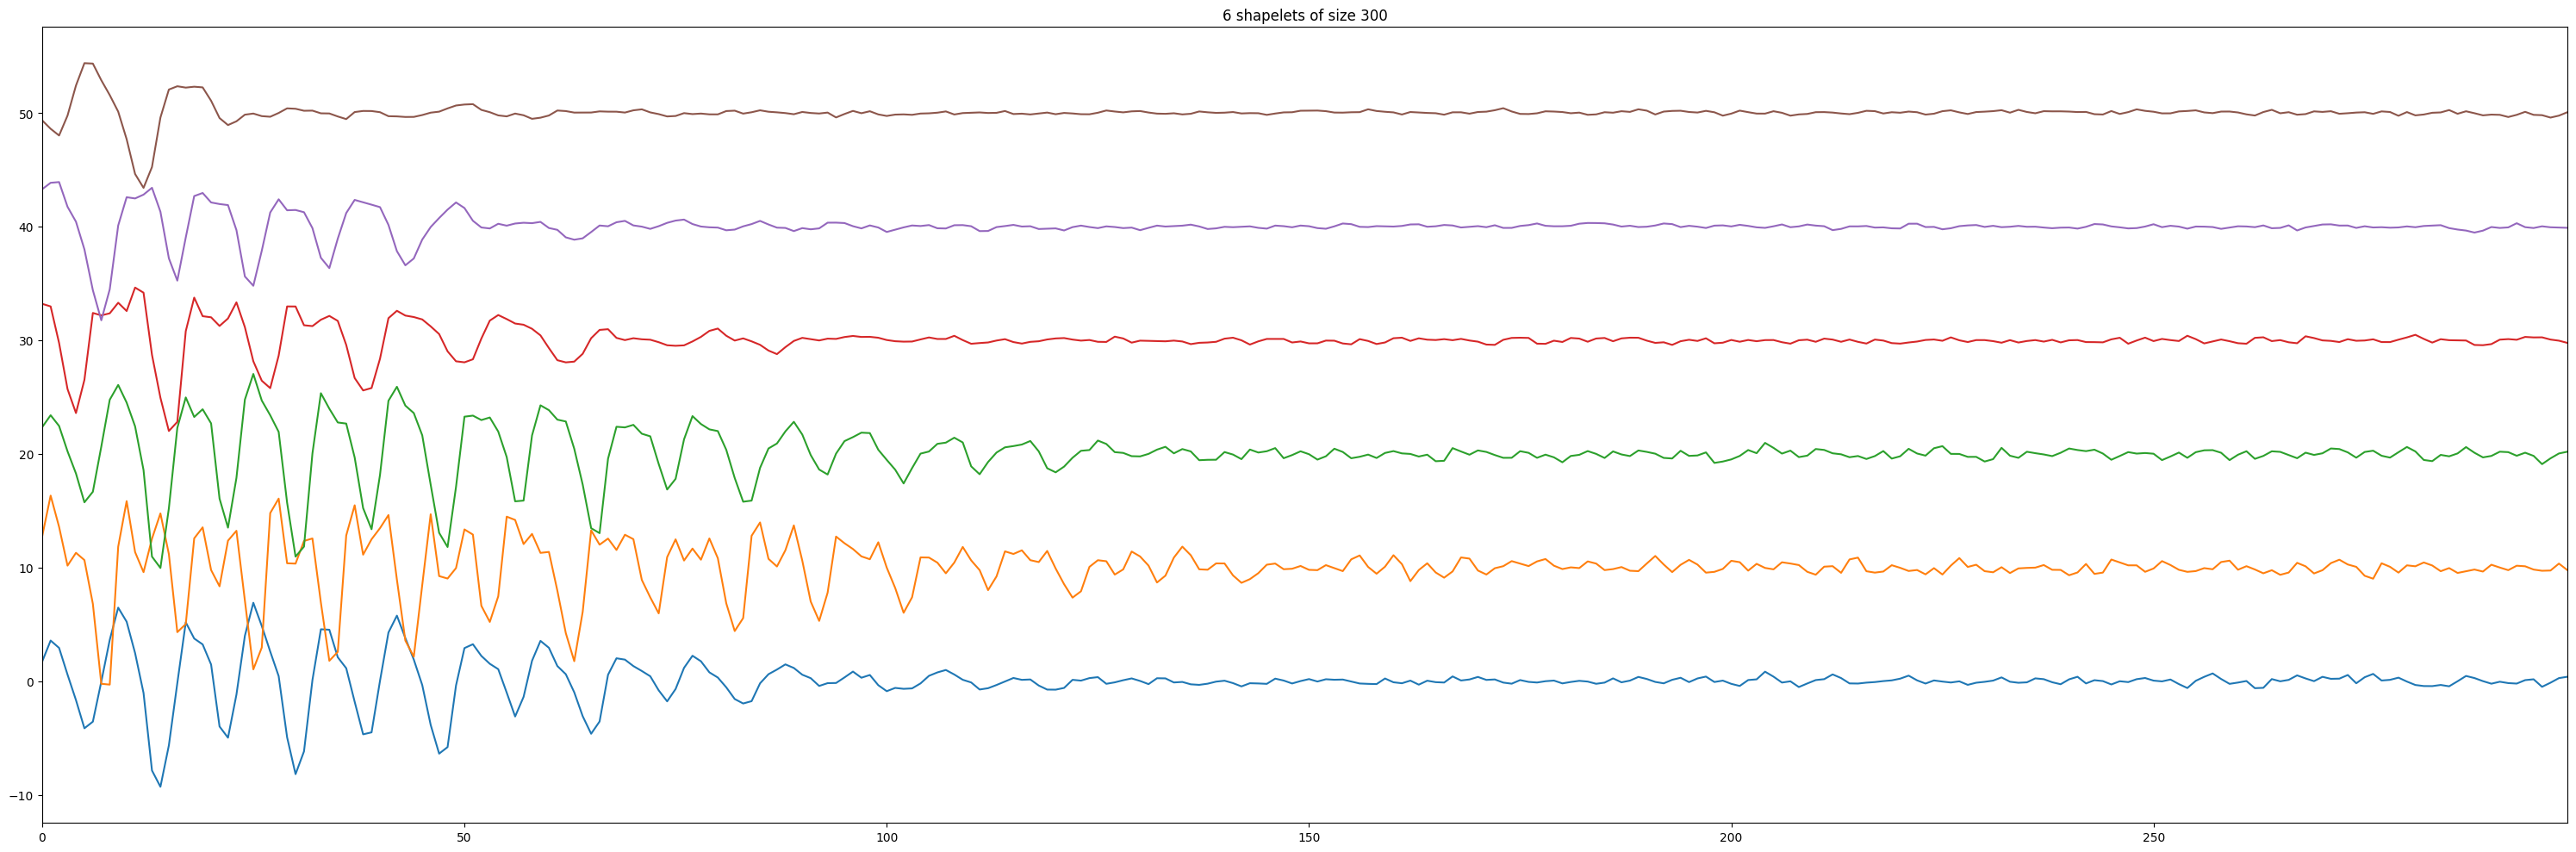

In [590]:
# Plot the different discovered shapelets
plt.figure(figsize=(30,10))
for i, sz in enumerate(shapelet_sizes.keys()):
    plt.subplot(len(shapelet_sizes), 1, i + 1)
    plt.title("%d shapelets of size %d" % (shapelet_sizes[sz], sz))
    i=0
    for shp in shp_clf.shapelets_:
        if ts_size(shp) == sz:
            plt.plot(shp.ravel()+i)
            i=i+10
    plt.xlim([0, max(shapelet_sizes.keys()) - 1])

plt.tight_layout()
plt.show()



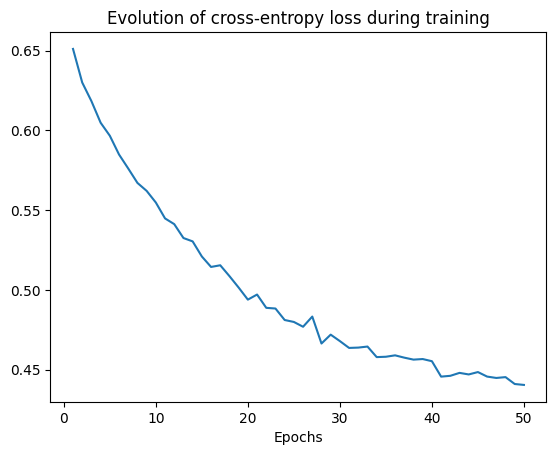

In [564]:
# The loss history is accessible via the `model_` that is a keras model
plt.figure()
plt.plot(numpy.arange(1, shp_clf.n_iter_ + 1), shp_clf.history_["loss"])
plt.title("Evolution of cross-entropy loss during training")
plt.xlabel("Epochs")
plt.show()

In [585]:
predicted_locations = shp_clf.locate(X_train)

0
1
2
3
4
5


(array([-12.5, -10. ,  -7.5,  -5. ,  -2.5,   0. ,   2.5,   5. ,   7.5,
         10. ]),
 [Text(0, -12.5, '−12.5'),
  Text(0, -10.0, '−10.0'),
  Text(0, -7.5, '−7.5'),
  Text(0, -5.0, '−5.0'),
  Text(0, -2.5, '−2.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 2.5, '2.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 7.5, '7.5'),
  Text(0, 10.0, '10.0')])

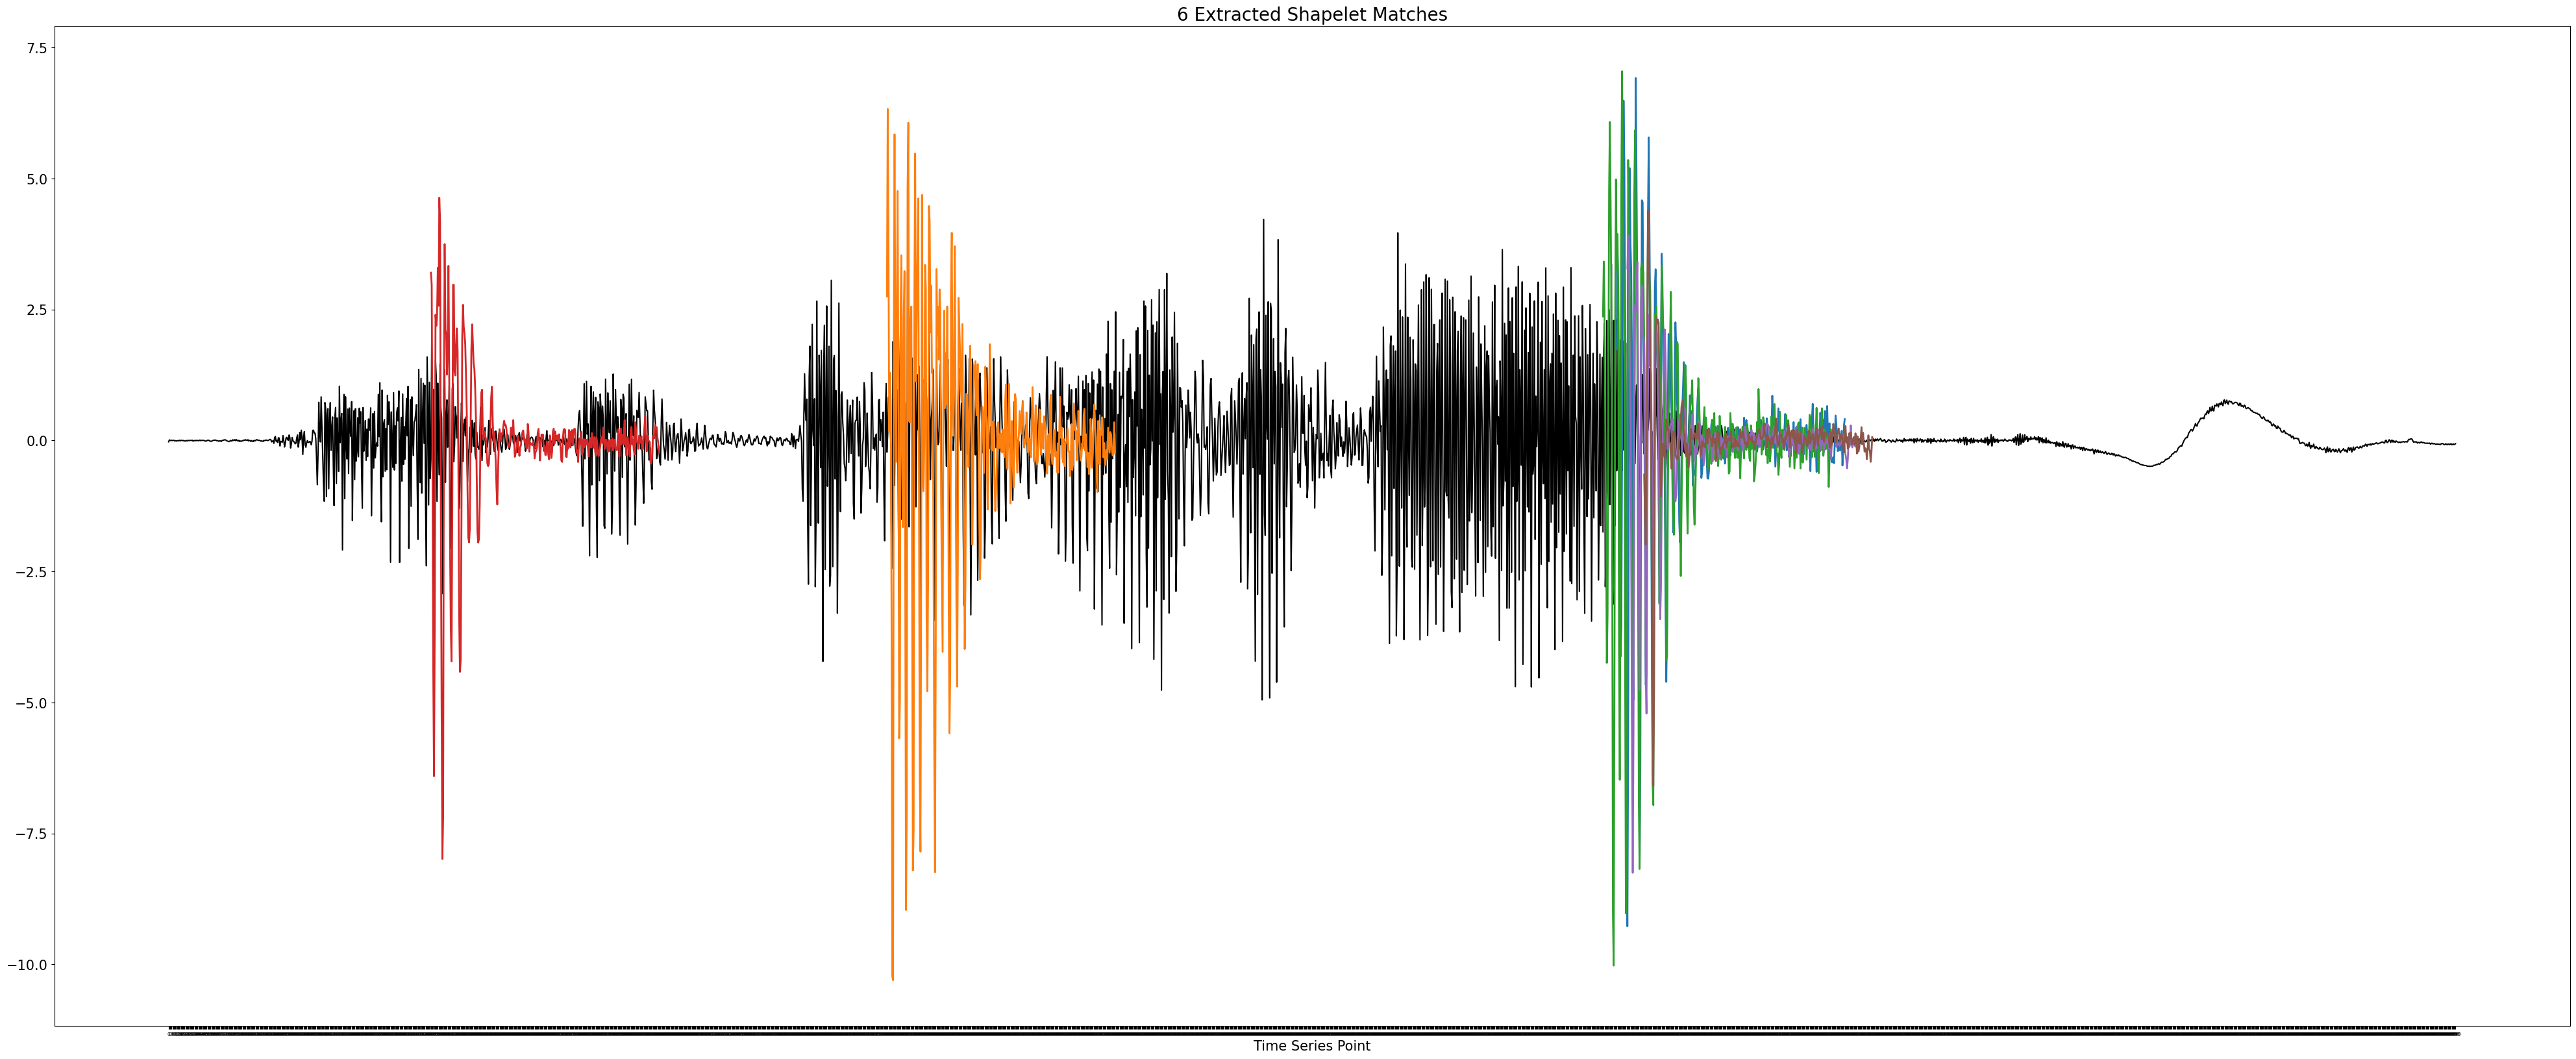

In [588]:
plt.figure(figsize=(50,20))
ts_id = 0
n_shapelets = sum(shapelet_sizes.values())
plt.title("{} Extracted Shapelet Matches".format(n_shapelets), fontsize=20)

shapelets_adjusted = np.array([shp_clf.shapelets_[n].ravel() for n in range(6)])
scostamento = 0.2
scale_shape = TimeSeriesScalerMinMax([X_train.iloc[ts_id].min()+scostamento, X_train.iloc[ts_id].max()-scostamento]).fit_transform(shapelets_adjusted)

plt.plot(X_train.iloc[ts_id], color='k')
i=0
for idx_shp, shp in enumerate(shapelets_adjusted):
    shp = shp + shapelets_adjusted[idx_shp].mean()*0.4
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)
    print(i)
    i=i+1

plt.xlabel('Time Series Point', fontsize=15)
plt.xticks(fontsize=5)
plt.yticks(fontsize=15)

### PAA

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Audio 
from collections import defaultdict
import librosa
from pyts.classification import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt

from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.shapelets import LearningShapelets, \
    grabocka_params_to_shapelet_size_dict
from tslearn.utils import ts_size

In [22]:
X_paa= np.load("ts_150_paa.npy")

In [23]:
X_paa.shape

(2452, 150)

In [24]:
X_train_paa=X_paa[0:1827,:]
X_test_paa=X_paa[1828:,:]


In [30]:
n_ts_paa, ts_sz_paa = X_train_paa.shape[:2]
n_classes = len(set(y_train))
# Set the number of shapelets per size as done in the original paper
shapelet_sizes_paa = grabocka_params_to_shapelet_size_dict(n_ts=n_ts_paa,
                                                       ts_sz=ts_sz_paa,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts_paa)
print('ts_sz', ts_sz_paa)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes_paa)

n_ts 1827
ts_sz 150
n_classes 2
shapelet_sizes {15: 5}


In [31]:
shp_clf_paa = LearningShapelets(n_shapelets_per_size=shapelet_sizes_paa,
                            optimizer=tf.optimizers.Adam(.01),
                            batch_size=1,
                            weight_regularizer=.01,
                            max_iter=100,
                            random_state=42,
                            verbose=0,
                            scale=False)
shp_clf_paa.fit(X_train_paa, y_train)



c:\Users\marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\tslearn\shapelets\shapelets.py:354: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  warnings.warn("The default value for 'scale' is set to False "


LearningShapelets(batch_size=1, max_iter=100, n_shapelets_per_size={15: 5},
                  optimizer=<keras.optimizers.adam.Adam object at 0x0000020053D15250>,
                  random_state=42, weight_regularizer=0.01)

In [33]:
# Make predictions and calculate accuracy score
y_pred = shp_clf_paa.predict(X_test_paa)
print("Correct classification rate:", accuracy_score(y_test, y_pred))

Correct classification rate: 0.5769230769230769


In [34]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.5769230769230769
F1-score [0.73170732 0.        ]
              precision    recall  f1-score   support

           0       0.58      1.00      0.73       360
           1       0.00      0.00      0.00       264

    accuracy                           0.58       624
   macro avg       0.29      0.50      0.37       624
weighted avg       0.33      0.58      0.42       624



c:\Users\marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\marco\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [35]:
X_train2_paa = shp_clf_paa.transform(X_train_paa)

In [36]:
X_train2_paa.shape

(1827, 5)

In [37]:
X_train2_paa

array([[0.05031974, 0.03338489, 0.35476992, 0.01237762, 0.09498341],
       [0.04265922, 0.02870519, 0.32690838, 0.01110208, 0.08045561],
       [0.03175032, 0.02114583, 0.3117109 , 0.013542  , 0.06669539],
       ...,
       [0.04279421, 0.03266309, 0.33444655, 0.01081563, 0.08428956],
       [0.04542539, 0.02732147, 0.285556  , 0.01262298, 0.08418208],
       [0.03826515, 0.02552754, 0.31230286, 0.01197189, 0.07818379]],
      dtype=float32)

In [38]:
X_test2_paa = shp_clf_paa.transform(X_test_paa)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
clf = KNeighborsClassifier(n_neighbors=14, weights='uniform')
clf.fit(X_train2_paa, y_train)

KNeighborsClassifier(n_neighbors=14)

In [41]:
y_pred = clf.predict(X_test2_paa)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7163461538461539
F1-score [0.7585266  0.65631068]
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       360
           1       0.67      0.64      0.66       264

    accuracy                           0.72       624
   macro avg       0.71      0.71      0.71       624
weighted avg       0.71      0.72      0.72       624



In [42]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
clf = DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_split=200,
    min_samples_leaf = 35)
clf.fit(X_train2_paa, y_train)

y_pred = clf.predict(X_test2_paa)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7403846153846154
F1-score [0.78795812 0.66528926]
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       360
           1       0.73      0.61      0.67       264

    accuracy                           0.74       624
   macro avg       0.74      0.72      0.73       624
weighted avg       0.74      0.74      0.74       624

